## 3.10 Logistic Regression

### 이진 분류 알고리즘
* Binary Classification
* 분류에 해당하는 레이블은 0과 1로만 구성한다.
* 0~1 범위를 결과로 갖는 모델이 필요하다.
* 선형 모델 불가
    * 학습 데이타 범위 보다 큰 값이 입력되면 결과는 0~1 범위 벗어남
* 회귀 모델 $H = WX$에 Sigmoid 함수를 적용해서 분류에 사용한다.
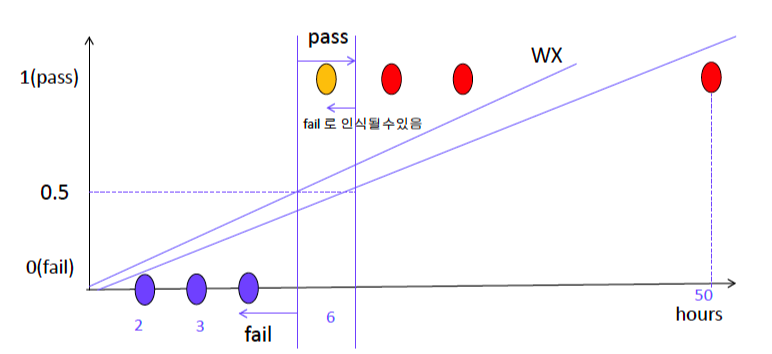

### Sigmoid 모델 가설
* $\displaystyle \sigma(t) = \frac{1}{1+exp^{(-WX)}}$
    * sigmoid 함수는 1을 나누는데 1에 어떤 수를 더한것으로 나눈다.
    * $\frac{1}{1} = 1$인데, 분모 1에다 뭔가를 더했으니 그 결과는 1 보다 클수 없다.
    * $exp(-WX)$의 크기가 커질 수록 0에 가까워지고, 작아질 수록 1에 가까워 진다.
    * $exp(-WX)$는 자연상수 $e^{-WX}$ 이므로 $WX$의 값이 크면 클 수록 작은 수가 되고 작으면 작을 수록 작은 수가 된다
    * 따라서 WX의 값이 크면 $e^{-WX}$의 값이 작아져서 $\frac{1}{1+e^{WX}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.
* 선형회귀 모델을 그대로 사용할 수 없는 이유는 훈련된 범위의 값보다 차이가 큰 값이 예측 입력으로 주어지면 결과가 0과 1의 범위를 벗어날 수 있기 때문이다.

#### 시그모이드 함수 그리기

In [6]:
def sigmoid(z):
    h = 1/(1+np.exp(-1*z))
    return h

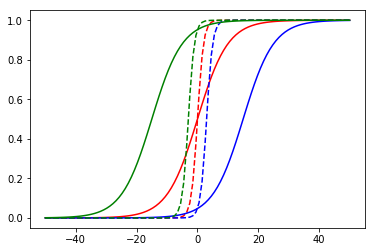

In [7]:
def drawSigmoid(w=0.5, b=0, style='-'):
    x = np.linspace(-50,50,100)
    y = sigmoid(x * w + b)
    plt.plot(x, y, style)
    
drawSigmoid(0.2,  0, 'r')
drawSigmoid(  1,  0, 'r--')

drawSigmoid(0.2, -3, 'b')
drawSigmoid(  1, -3, 'b--')

drawSigmoid(0.2,  3, 'g')
drawSigmoid(  1,  3, 'g--')


## 비용함수
* Hypothesis가 달라졌기 때문에 Cost 함수도 달라져야 한다.
* sigmoid 함수 결과에 MSE를 적용하면 Non-Convex 함수가 돼서 Local Minimize에 빠질 수 있다.
* log 함수를 이용해서 원래대로 Convex 함수로 만든다.
* $ cost(H(x), y) = 
  \begin{cases}
    -log(H(x)) & \quad\text{if } y=1\\
    -log(1-H(x)) & \quad\text {if } y=0
  \end{cases}$
* 하나로 만든 비용함수 : $ \displaystyle cost(H(x), y) = \frac{1}{m}\sum_{i=1}^m[-ylog(H(x))-(1-y)log(1-H(x))]$
* 비용 도함수 : $\displaystyle\frac{\partial}{\partial{H(x)}} = \frac{1}{m}\sum_{i=1}^m((H(x)^T X)-y)x$
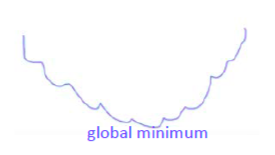

### 랜덤수 분류 예제

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

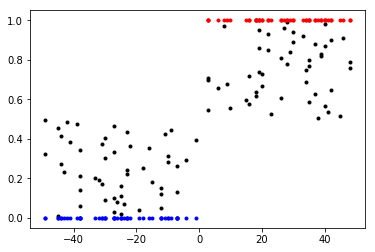

In [9]:
ma, mb = 50, 50
m = ma + mb
Xa = np.random.randint(-50,0, (ma))
Xb = np.random.randint(0,50, (mb))
#X = X + 200* np.random.randn(m)

X = np.concatenate((Xa, Xb), axis=0)
y = np.zeros((m))
y[mb:] = 1
#y[np.random.randint(0,100, 20)] = np.random.randint(0,2, 20)

temp = np.linspace(0,1,m)
plt.plot(X ,temp, 'k.')
plt.plot(X[y==0] ,y[y==0], 'b.')
plt.plot(X[y==1], y[y==1], 'r.')


epoch: 0  cost: 0.009295872404202184  gradient: 13.06861385905273  W: 0.5333583704274338
epoch: 20  cost: 1.1224111403790569  gradient: -5.599166129317894  W: 0.029337842303839484
epoch: 40  cost: 1.123722775608278  gradient: -5.611284798246596  W: 0.029388870162941803
epoch: 60  cost: 1.1237235077901995  gradient: -5.611291557094389  W: 0.02938889860000328
epoch: 80  cost: 1.123723508196868  gradient: -5.611291560848385  W: 0.029388898615797777
Final W: -0.026724016992698142


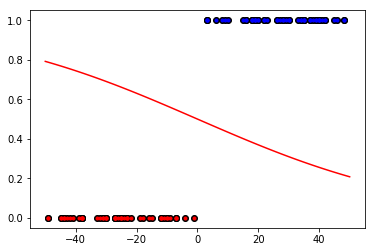

In [10]:
plt.plot(X ,y, 'ko')

W = np.random.rand()

learning_rate = 0.01
epochs = 100
for epoch in range(epochs):
    h = sigmoid(W*X)
    cost = 1/m * np.sum(-y * np.log(h)-(1.0-y)*np.log(1.0-h))
    gradient = 1/m * np.sum(h *X - y) 
    W = W - learning_rate * gradient
    if epoch % 20 == 0:
        print('epoch:', epoch, ' cost:', cost, ' gradient:', gradient, ' W:', W)
        #plt.plot(X, sigmoid(W*X), '--')
print('Final W:', W)
pred = sigmoid(W*X)
red = pred> 0.5
blue = pred<= 0.5
plt.plot(X[red], y[red], 'r.')
plt.plot(X[blue], y[blue], 'b.')
drawSigmoid(W, 0, 'r-')
#plt.legend()